In [329]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Plot results from MVPA analysis

### load

In [330]:
#load classification acc dictionary

top_dir = '/jukebox/graziano/coolCatIsaac/ATM/code/analysis/MVPA/final_9-1-23'
acc_dir = top_dir +'/classification'
act_dir = top_dir +'/activations'
plot_dir = top_dir + '/schaef/plots'

date = '2023-07-17'
analname = 'spacenorm'
act_dict_name = f'shaef_roi_activations_earlyWin_spacenorm_2023-07-17'
acc_dict_name = f'classification_between-cond_{analname}_svm_{date}' # CHANGE ME
#acc_dict_name = f'CV13_classification_between-cond_{analname}_svm_{date}' # CHANGE ME
#acc_dict_name = f'classification_between-cond_{analname}_L2_{date}' # CHANGE ME

#acc_dict_name = f'cross_cond_spacenorm_svm_{date}' # CHANGE ME



# activation 
acts = np.load(os.path.join(act_dir, '%s.npy') %(act_dict_name ), allow_pickle=True).item()

#load activation dictionary
acc = np.load(os.path.join(acc_dir, '%s.npy') %(acc_dict_name ), allow_pickle=True).item()

print(f'number of accs: {len(acc)}')

number of accs: 72


### boosstrap

In [271]:
conds = 'OM_OC'
roi = 'RH_Cont_Par_2' #  LH_Default_PFC_11
win = 'win5'
anal = f'{conds}_{roi}_{win}'
anal
print(anal, acc[anal]['roc'])

OM_OC_RH_Cont_Par_2_win5 0.5406579776215235


In [272]:
acc_folds = acc[anal]['OutRoc_array']

In [273]:
acc_folds

array([0.48009502, 0.55811966, 0.57806324, 0.52094614, 0.56606583])

In [274]:
n_folds = len(acc_folds)
n_boots = 10000

boots = []
for b in np.arange(n_boots):
    boot = np.random.choice(acc_folds, n_folds, replace=True)
    mean_boot = np.mean(boot)
    boots.append(mean_boot)

In [275]:
np.mean(boots)

0.5407409416407242

In [276]:
print(f'upper: {np.percentile(boots, 95)}\n' 
      f'med: {np.percentile(boots, 50)}\n'
      f'lower: {np.percentile(boots, 5)}\n'
     f'test stat: {np.mean(acc_folds)}')

upper: 0.5660970913144826
med: 0.541393497466143
lower: 0.5128941095636762
test stat: 0.5406579776215235


In [106]:

for anal in sorted(acc):
    print(f'{anal} is {np.round(acc[anal]["roc"],4)}')


OM_OC_LH_Default_PFC_11_win1 is 0.5039
OM_OC_LH_Default_PFC_11_win2 is 0.4951
OM_OC_LH_Default_PFC_11_win3 is 0.5151
OM_OC_LH_Default_PFC_11_win4 is 0.5888
OM_OC_LH_Default_PFC_11_win5 is 0.5003
OM_OC_LH_Default_PFC_11_win6 is 0.5069
OM_OC_LH_Default_PFC_11_win7 is 0.4905
OM_OC_LH_Default_PFC_11_win8 is 0.4822
OM_OC_RH_Cont_Par_2_win1 is 0.4835
OM_OC_RH_Cont_Par_2_win2 is 0.4683
OM_OC_RH_Cont_Par_2_win3 is 0.4894
OM_OC_RH_Cont_Par_2_win4 is 0.5095
OM_OC_RH_Cont_Par_2_win5 is 0.5314
OM_OC_RH_Cont_Par_2_win6 is 0.4995
OM_OC_RH_Cont_Par_2_win7 is 0.4915
OM_OC_RH_Cont_Par_2_win8 is 0.5
OM_OC_rTPJ_SM-GLM_win4 is 0.5348
SM_OM_LH_Default_PFC_11_win1 is 0.4886
SM_OM_LH_Default_PFC_11_win2 is 0.4805
SM_OM_LH_Default_PFC_11_win3 is 0.4906
SM_OM_LH_Default_PFC_11_win4 is 0.5028
SM_OM_LH_Default_PFC_11_win5 is 0.4809
SM_OM_LH_Default_PFC_11_win6 is 0.4908
SM_OM_LH_Default_PFC_11_win7 is 0.4758
SM_OM_LH_Default_PFC_11_win8 is 0.467
SM_OM_RH_Cont_Par_2_win1 is 0.5031
SM_OM_RH_Cont_Par_2_win2 is 0.49

# start plotting 

In [331]:
### plotting vars ###


## subset windows for plotting
subset_win_start = 3
subset_win_end = 7

## start window *label
start_win = 0
#x_label = np.arange(start_win, subset_win_end -  subset_win_start + 1)
x_label = ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']


### CREATE DICTIONARY ### 
## set conditions for plotting ##
cond_list = np.array(['OM_OC', 'SM_SC', 'SM_OM'])
roi_list = ['dmPFC', 'rTPJ']
roi_list = [ 'LH_Default_PFC_11', 'RH_Default_Par_3'] # 'RH_Cont_Par_2',
roi_list = ['meta_MPFC_10mm_resampled', 'meta_R_TPJ_10mm_resampled']
roi_list = [ 'LH_Default_PFC_11', 'RH_Cont_Par_2', 'rTPJ_SM-GLM'] # 'RH_Cont_Par_2','rTPJ_SM-GLM'
roi_list = [ 'LH_Default_PFC_11', 'RH_Cont_Par_2'] # 'RH_Cont_Par_2','rTPJ_SM-GLM'

## target score metric  ##
target = 'roc'

## create dictionary for plotting # 
cond_dic = {}
for cond in cond_list:
    roi_dic = {}
    for roi in roi_list:
        acc_sort = []
        for win_num in range(subset_win_start,subset_win_end+1):
            #print(f'{cond}_{roi}_win{win_num}')
            anal = f'{cond}_{roi}_win{win_num}'
            acc_sort.append(acc[anal][target])
        roi_dic[roi] = acc_sort
        
    cond_dic[cond] = roi_dic
print('done')

done


In [337]:
np.round(np.array(cond_dic[conds][roi_1]) * 100, 1)

array([48.9, 49.9, 49.3, 47.9, 48.5])

## OM vs OC

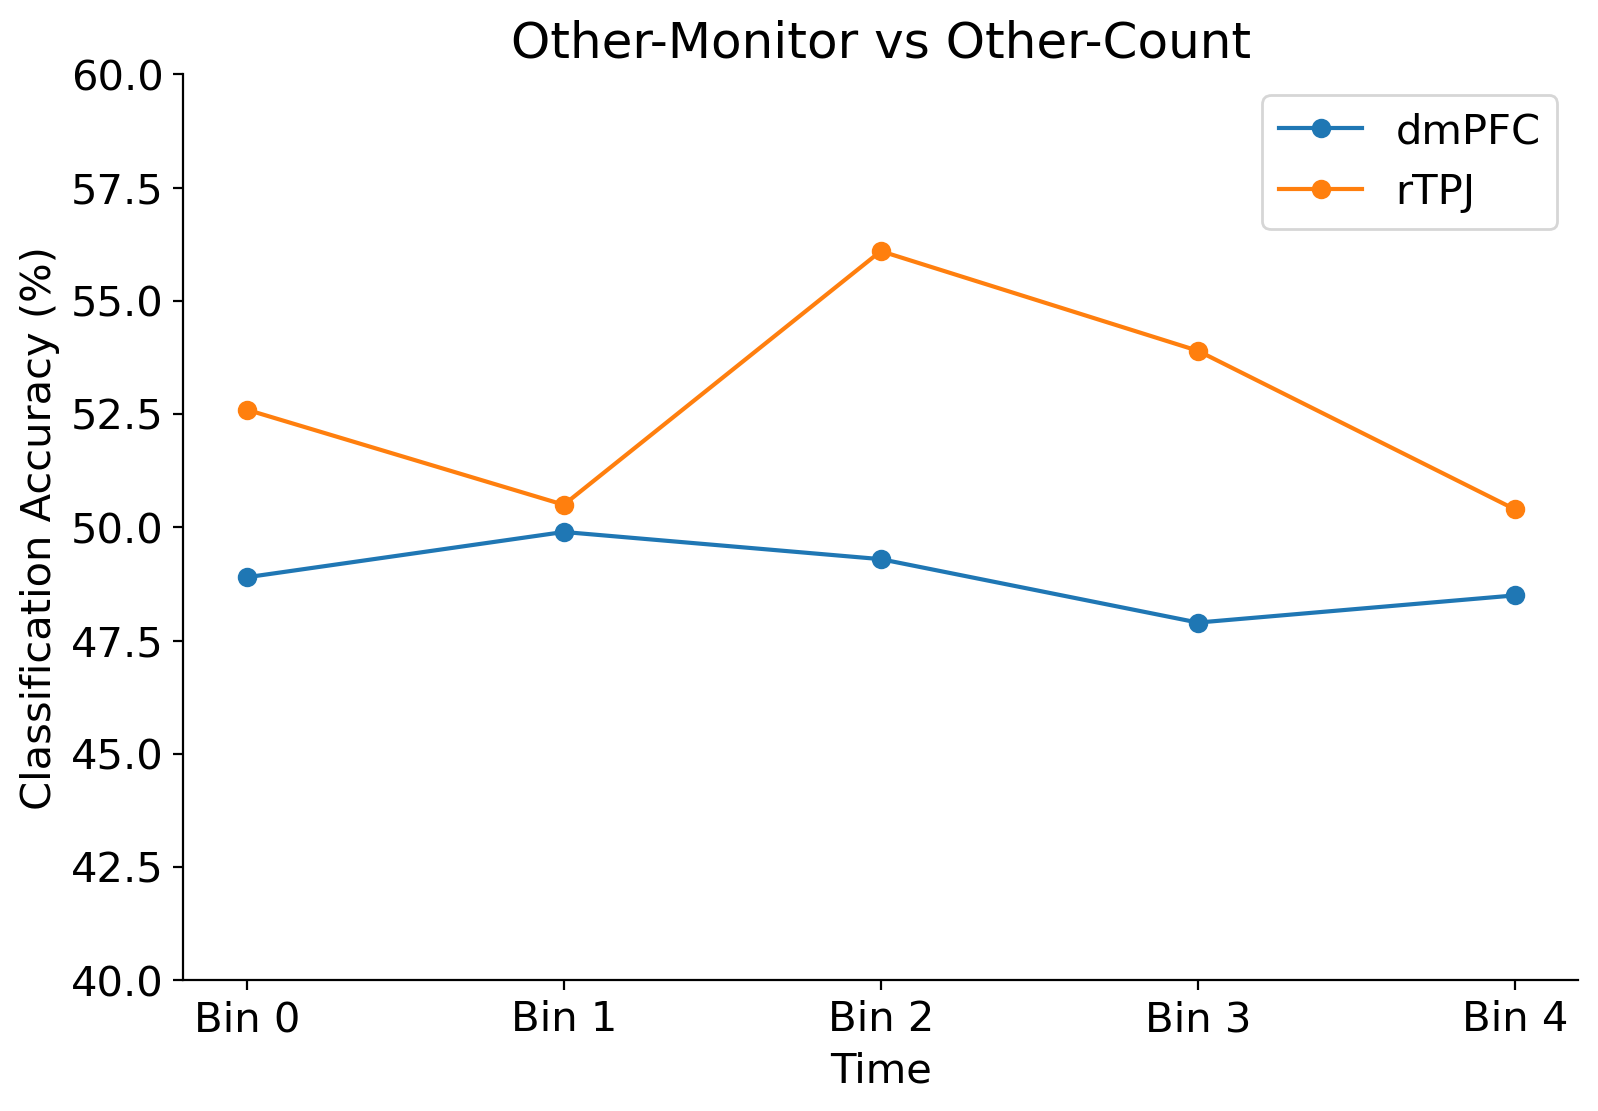

In [339]:
### MORE PLOTTING VARS 
conds = 'SM_OM'
roi_1 = 'LH_Default_PFC_11'#'dmPFC'
roi_2 = 'RH_Cont_Par_2' #rTPJ' # RH_Default_Par_3 RH_Cont_Par_2
roi_3 = 'rTPJ_SM-GLM'

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 200

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, np.round(np.array(cond_dic[conds][roi_1])*100, 1), marker = 'o', label = 'dmPFC')
#plt.plot(x, cond_dic['OM_OC']['motor'], marker = 'o', label = 'motor')
plt.plot(x_label, np.round(np.array(cond_dic[conds][roi_2])*100, 1), marker = 'o', label = 'rTPJ')
#plt.plot(x_label, cond_dic[conds][roi_3], marker = 'o', label = 'rTPJ_2')

plt.axhline(y = 0.5, color = 'gray', linestyle = ':', alpha = 0.8) #, label = "chance" 

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(40, 60)

plt.title("Other-Monitor vs Other-Count")
plt.xlabel('Time')
plt.ylabel('Classification Accuracy (%)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()


## SM vs SC

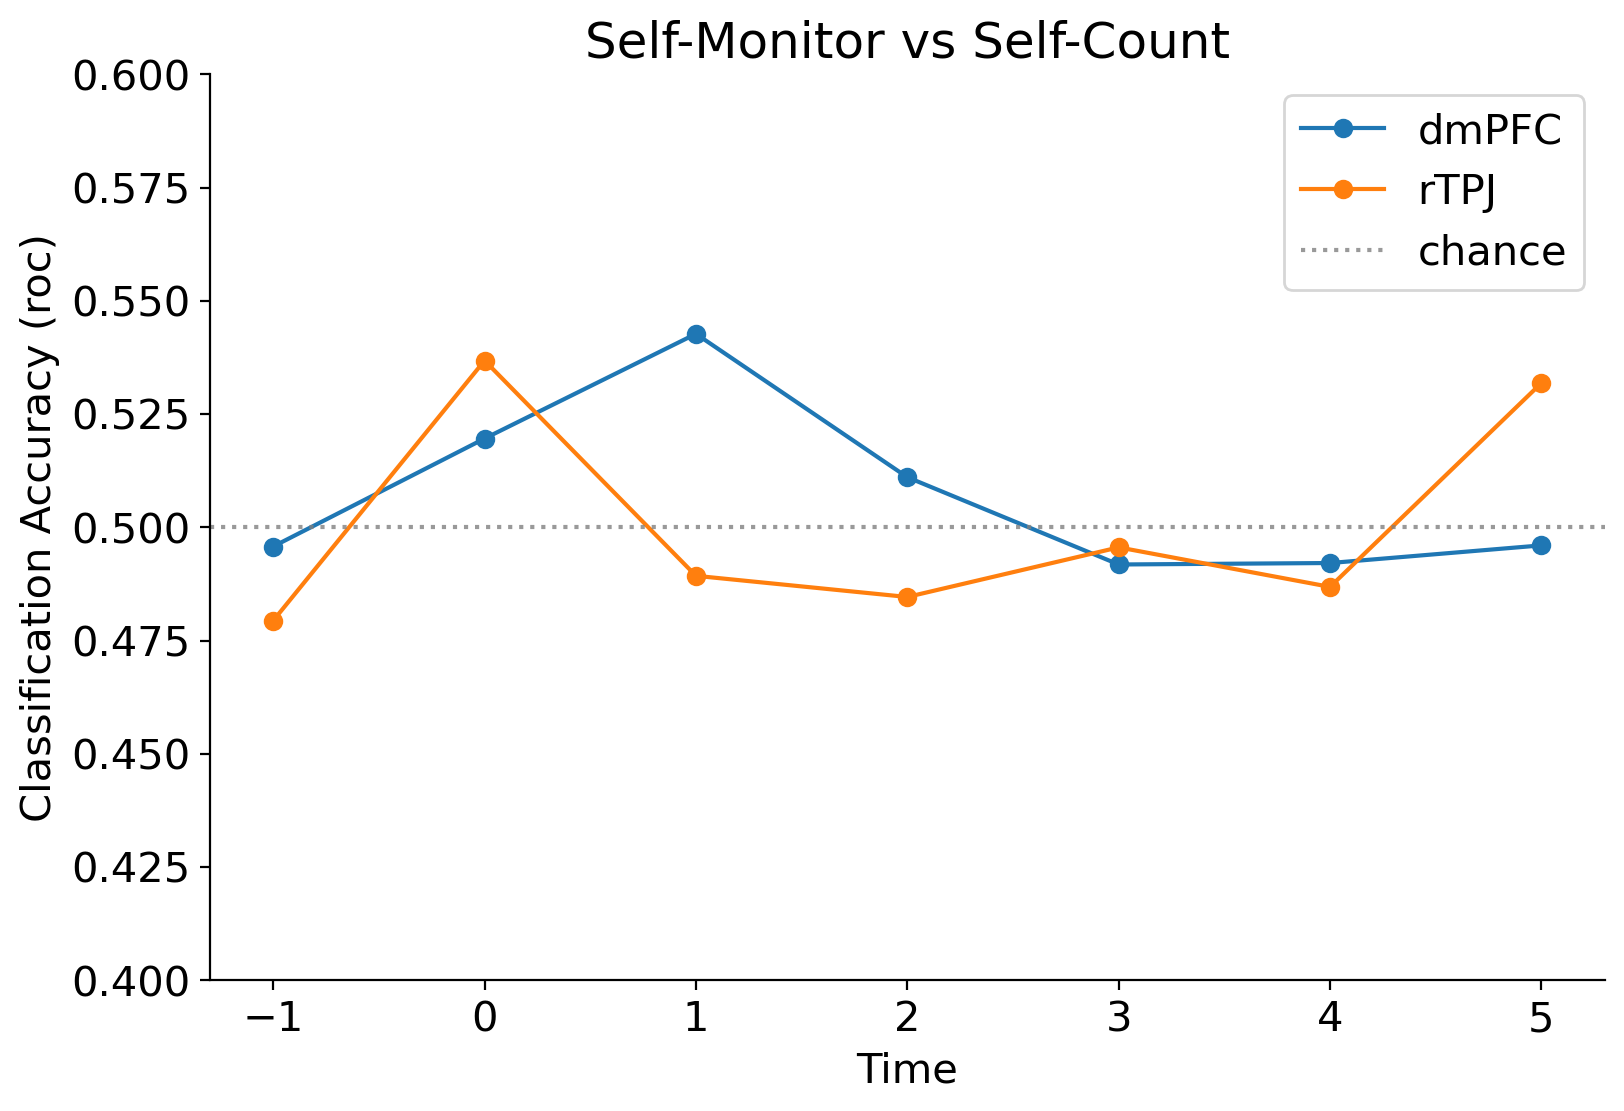

In [160]:
### MORE PLOTTING VARS 
conds = 'SM_SC'
roi_1 = 'LH_Default_PFC_11'#'dmPFC'
roi_2 = 'RH_Cont_Par_2'#'rTPJ' # RH_Default_Par_3 RH_Cont_Par_2
roi_3 = 'rTPJ_SM-GLM'

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 200

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, cond_dic[conds][roi_1], marker = 'o', label = 'dmPFC')
#plt.plot(x, cond_dic['OM_OC']['motor'], marker = 'o', label = 'motor')
plt.plot(x_label, cond_dic[conds][roi_2], marker = 'o', label = 'rTPJ')
#plt.plot(x_label, cond_dic[conds][roi_3], marker = 'o', label = 'rTPJ_2')


plt.axhline(y = 0.5, color = 'gray', linestyle = ':', alpha = 0.8, label = "chance" )

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(0.4, 0.6)

plt.title("Self-Monitor vs Self-Count")
plt.xlabel('Time')
plt.ylabel('Classification Accuracy (roc)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()


## SM-OM

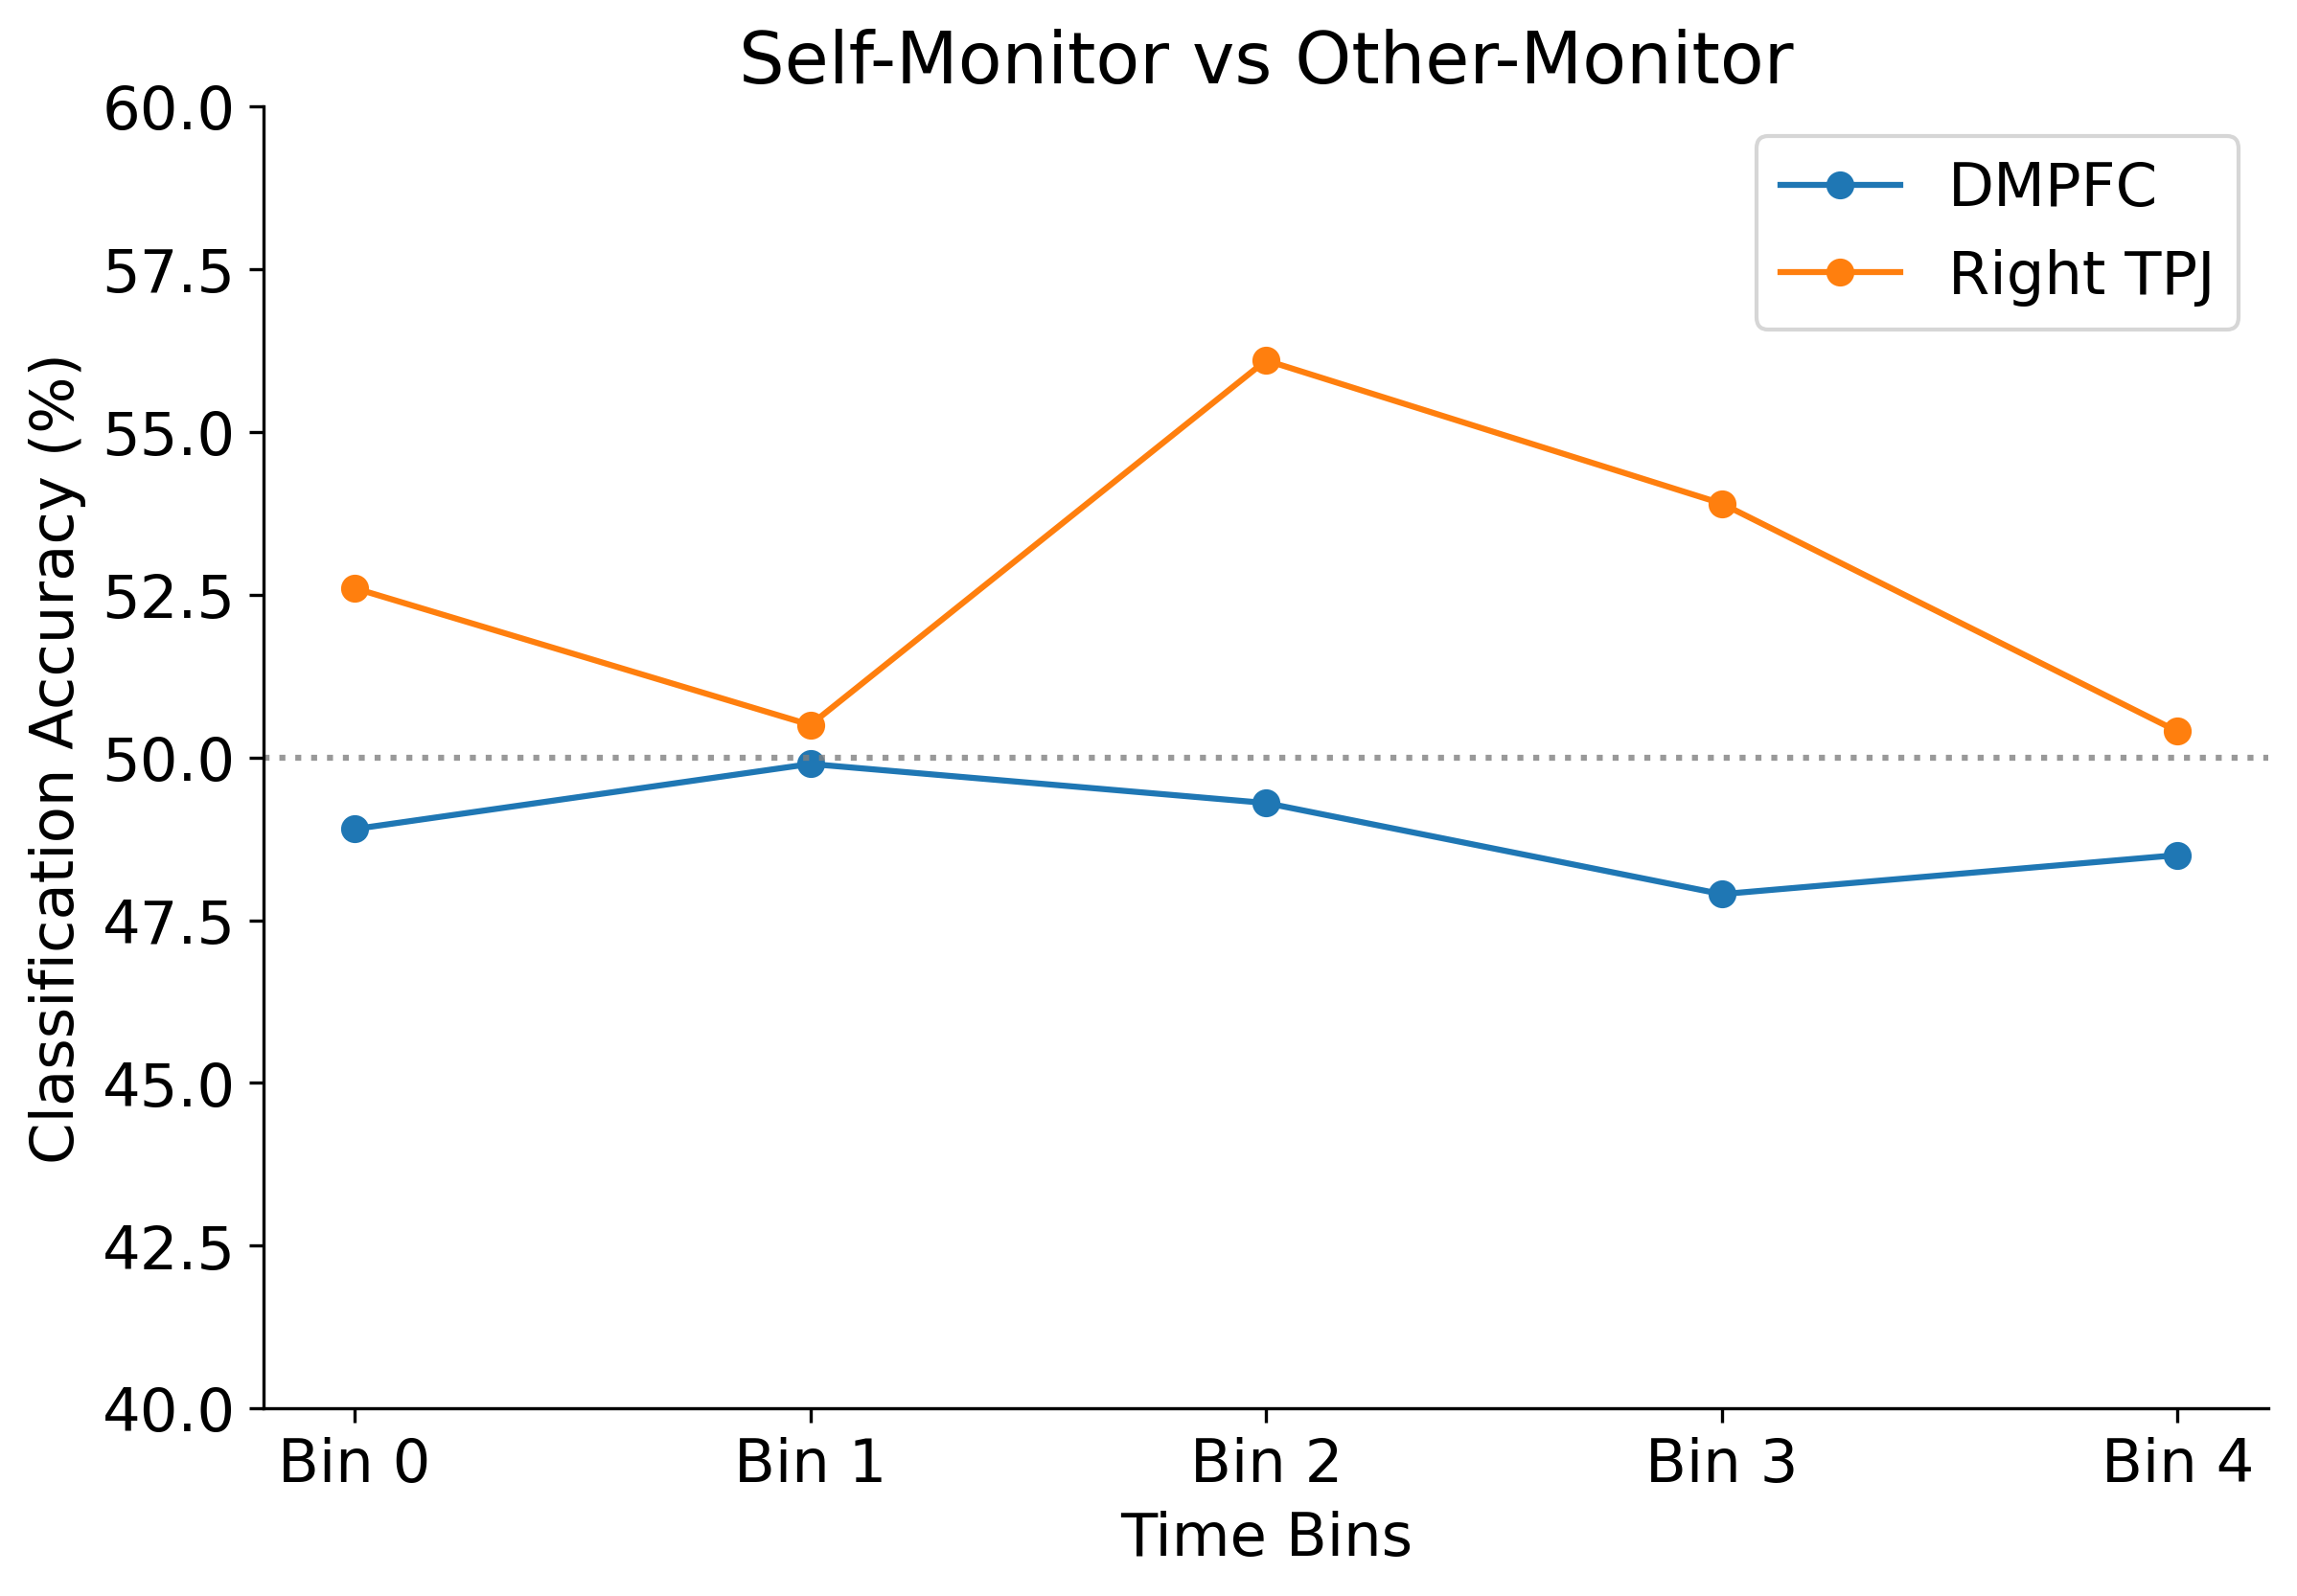

In [344]:
### MORE PLOTTING VARS 
conds = 'SM_OM'
roi_1 = 'LH_Default_PFC_11'#'dmPFC'
roi_2 = 'RH_Cont_Par_2'#'rTPJ' # RH_Default_Par_3 RH_Cont_Par_2

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 300

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, np.round(np.array(cond_dic[conds][roi_1])*100, 1), marker = 'o', label = 'DMPFC')
#plt.plot(x, cond_dic['OM_OC']['motor'], marker = 'o', label = 'motor')
plt.plot(x_label, np.round(np.array(cond_dic[conds][roi_2])*100, 1), marker = 'o', label = 'Right TPJ')
#plt.plot(x_label, cond_dic[conds][roi_3], marker = 'o', label = 'rTPJ_2')

plt.axhline(y = 50, color = 'gray', linestyle = ':', alpha = 0.8) #, label = "chance" 

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(40, 60)

plt.title("Self-Monitor vs Other-Monitor")
plt.xlabel('Time Bins')
plt.ylabel('Classification Accuracy (%)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()


In [49]:
5+5

10

# CROSS COND FINAL 

### load

In [346]:
#load classification acc dictionary

top_dir = '/jukebox/graziano/coolCatIsaac/ATM/code/analysis/MVPA'
acc_dir = top_dir +'/final_9-1-23/classification'
plot_dir = top_dir + '/schaef/plots'

date = '2023-07-17'
acc_dict_name = f'cross_cond_spacenorm_svm_{date}'
#acc_dict_name = f'CV13_cross_cond_spacenorm_svm_{date}'
#CV13_cross_cond_spacenorm_svm_




#load activation dictionary
acc = np.load(os.path.join(acc_dir, '%s.npy') %(acc_dict_name ), allow_pickle=True).item()

print(f'number of accs: {len(acc)}')

number of accs: 48


### boosstrap

In [286]:
cond_set1 = 'OM_OC' #'OM_OC'
cond_set2 = 'SM_SC'#'SM_SC'
roi = 'LH_Default_PFC_11' # RH_Default_Par_3
win = 'win4'
anal = f'{cond_set1}_{roi}_{win}-{cond_set2}_{roi}_{win}'

print(anal, acc[anal]['roc'])

OM_OC_LH_Default_PFC_11_win4-SM_SC_LH_Default_PFC_11_win4 0.5568608200010751


In [287]:
acc_folds = acc[anal]['RocAcc_array']

In [288]:
acc_folds

array([0.58495146, 0.49225758, 0.59410542, 0.59333333, 0.51965631])

In [289]:
np.mean(acc_folds)

0.5568608200010751

In [290]:
n_folds = len(acc_folds)
n_boots = 10000

boots = []
for b in np.arange(n_boots):
    boot = np.random.choice(acc_folds, n_folds, replace=True)
    mean_boot = np.mean(boot)
    boots.append(mean_boot)

In [291]:
np.mean(boots)

0.5568602332667959

In [292]:
n_folds = len(acc_folds)
n_boots = 10000

print(f'upper: {np.percentile(boots, 97.5)}\n' 
      f'med: {np.percentile(boots, 50)}\n'
      f'lower: {np.percentile(boots, 2.5)}\n'
     f'test stat: {np.mean(acc_folds)}')

upper: 0.5919657943242531
med: 0.5568608200010751
lower: 0.5179524747498186
test stat: 0.5568608200010751


In [3]:

for anal in sorted(acc):
    print(f'{anal} is {np.round(acc[anal]["roc"],4)}')


OM_OC_LH_Default_PFC_11_win1-SM_SC_LH_Default_PFC_11_win1 is 0.4761
OM_OC_LH_Default_PFC_11_win2-SM_SC_LH_Default_PFC_11_win2 is 0.5029
OM_OC_LH_Default_PFC_11_win3-SM_SC_LH_Default_PFC_11_win3 is 0.5182
OM_OC_LH_Default_PFC_11_win4-SM_SC_LH_Default_PFC_11_win4 is 0.5569
OM_OC_LH_Default_PFC_11_win5-SM_SC_LH_Default_PFC_11_win5 is 0.5143
OM_OC_LH_Default_PFC_11_win6-SM_SC_LH_Default_PFC_11_win6 is 0.5003
OM_OC_LH_Default_PFC_11_win7-SM_SC_LH_Default_PFC_11_win7 is 0.5119
OM_OC_LH_Default_PFC_11_win8-SM_SC_LH_Default_PFC_11_win8 is 0.5168
OM_OC_RH_Cont_Par_2_win1-SM_SC_RH_Cont_Par_2_win1 is 0.4701
OM_OC_RH_Cont_Par_2_win2-SM_SC_RH_Cont_Par_2_win2 is 0.5374
OM_OC_RH_Cont_Par_2_win3-SM_SC_RH_Cont_Par_2_win3 is 0.5035
OM_OC_RH_Cont_Par_2_win4-SM_SC_RH_Cont_Par_2_win4 is 0.5189
OM_OC_RH_Cont_Par_2_win5-SM_SC_RH_Cont_Par_2_win5 is 0.4949
OM_OC_RH_Cont_Par_2_win6-SM_SC_RH_Cont_Par_2_win6 is 0.5051
OM_OC_RH_Cont_Par_2_win7-SM_SC_RH_Cont_Par_2_win7 is 0.4828
OM_OC_RH_Cont_Par_2_win8-SM_SC_RH_Co

In [347]:
### plotting vars ###

## subset windows for plotting
subset_win_start = 3
subset_win_end = 7

## start window *label
start_win = 0
#x_label = np.arange(start_win, subset_win_end -  subset_win_start + 1)
x_label = ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']

### CREATE DICTIONARY ### 
## set conditions for plotting ##
cond_list = np.array(['OM_OC', 'SM_SC' ])
cond_set1 = 'OM_OC' #'OM_OC'
cond_set2 = 'SM_SC'#'SM_SC'
roi_list = ['dmPFC', 'rTPJ']
roi_list = ['rTPJ_SM-GLM', 'LH_Default_PFC_11', 'RH_Cont_Par_2'] #

## target score metric  ##
target = 'roc'

## create dictionary for plotting # 
roi_dic = {}
for roi in roi_list:
    acc_sort = []
    for win_num in range(subset_win_start, subset_win_end + 1):
        #print(f'{cond}_{roi}_win{win_num}')
        anal = f'{cond_set1}_{roi}_win{win_num}-{cond_set2}_{roi}_win{win_num}'
        acc_sort.append(acc[anal][target])
    roi_dic[roi] = acc_sort

print('done')

done


### other to self

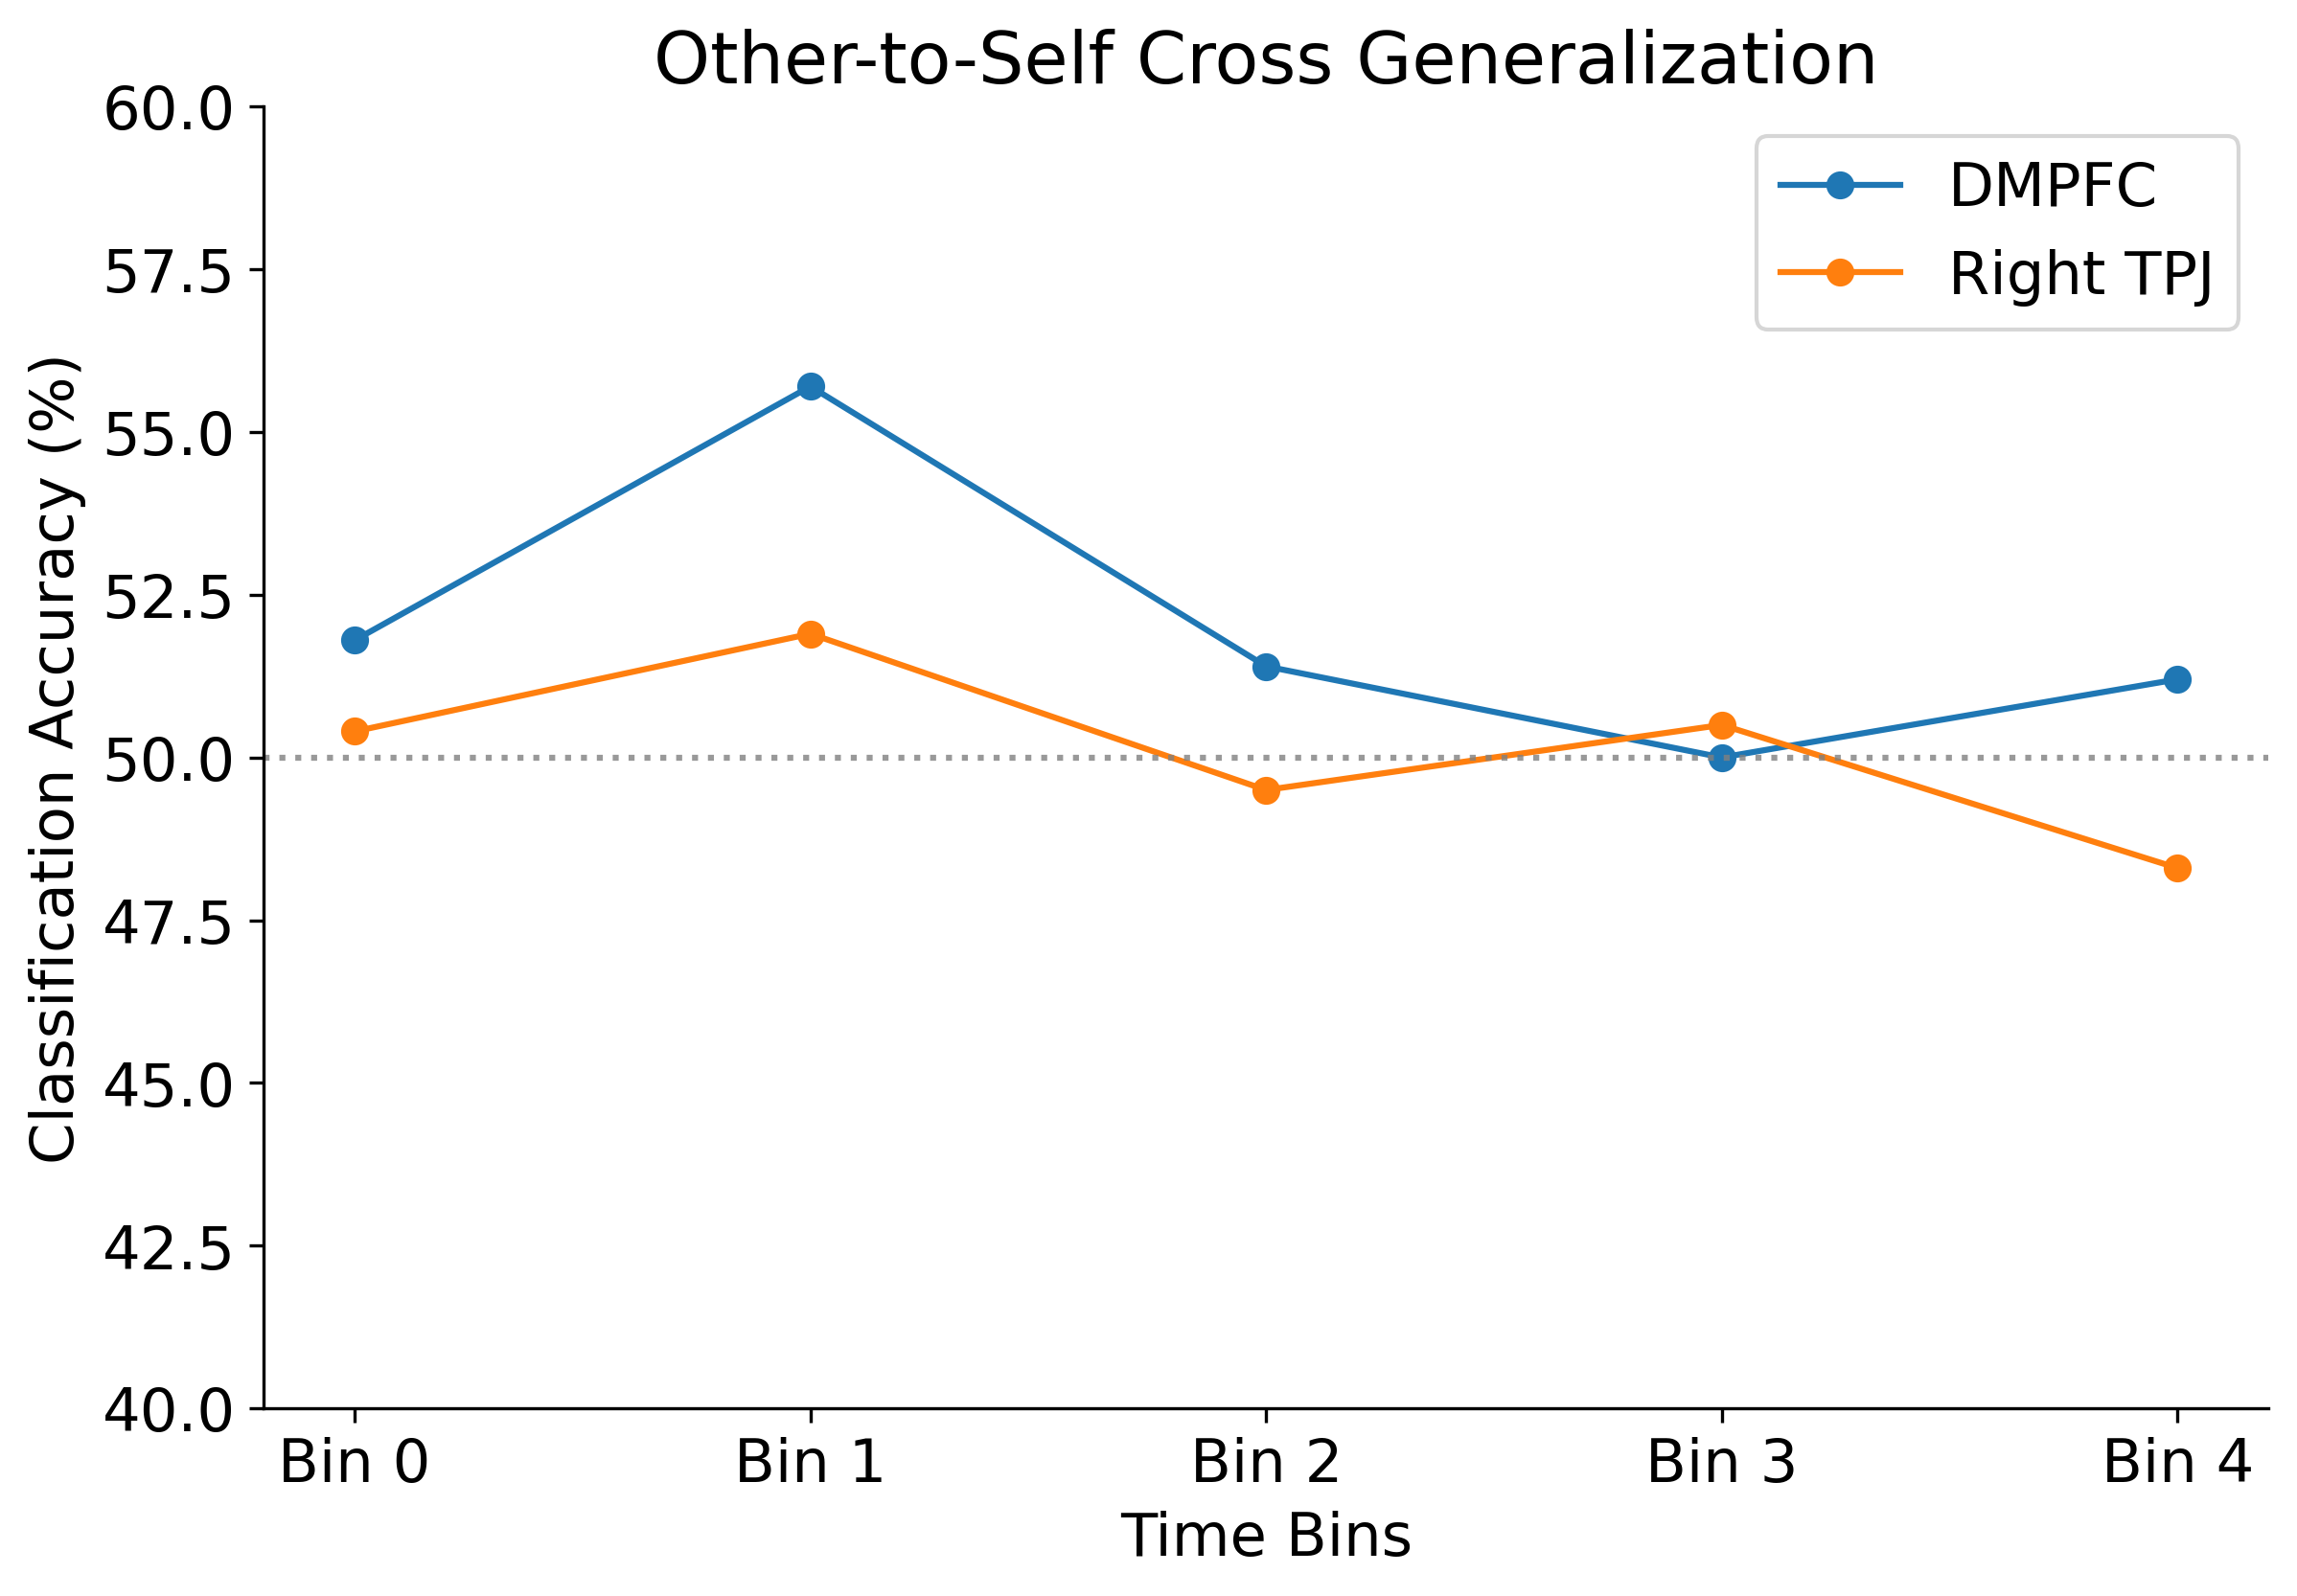

In [349]:
### MORE PLOTTING VARS 
roi_1 = 'LH_Default_PFC_11'
roi_2 = 'RH_Cont_Par_2'
roi_3 = 'rTPJ_SM-GLM'

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 300

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, np.round(np.array(roi_dic[roi_1])*100, 1), marker = 'o', label = 'DMPFC')
plt.plot(x_label, np.round(np.array(roi_dic[roi_2])*100, 1), marker = 'o', label = 'Right TPJ')
#plt.plot(x_label, roi_dic[roi_3], marker = 'o', label = 'rTPJ_L')

plt.axhline(y = 50, color = 'gray', linestyle = ':', alpha = 0.8) # , label = "chance" 

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(40, 60)

plt.title(f"Other-to-Self Cross Generalization")
plt.xlabel('Time Bins')
plt.ylabel('Classification Accuracy (%)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()


### self to other 

In [351]:
### plotting vars ###

## subset windows for plotting
subset_win_start = 3
subset_win_end = 7

## start window *label
start_win = 0
#x_label = np.arange(start_win, subset_win_end -  subset_win_start + 1)
x_label = ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']

### CREATE DICTIONARY ### 
## set conditions for plotting ##
cond_list = np.array(['OM_OC', 'SM_SC' ])
cond_set1 = 'SM_SC' #'OM_OC'
cond_set2 = 'OM_OC'#'SM_SC'
roi_list = ['dmPFC', 'rTPJ']
roi_list = ['rTPJ_SM-GLM', 'LH_Default_PFC_11', 'RH_Cont_Par_2'] #

## target score metric  ##
target = 'roc'

## create dictionary for plotting # 
roi_dic = {}
for roi in roi_list:
    acc_sort = []
    for win_num in range(subset_win_start, subset_win_end + 1):
        #print(f'{cond}_{roi}_win{win_num}')
        anal = f'{cond_set1}_{roi}_win{win_num}-{cond_set2}_{roi}_win{win_num}'
        acc_sort.append(acc[anal][target])
    roi_dic[roi] = acc_sort


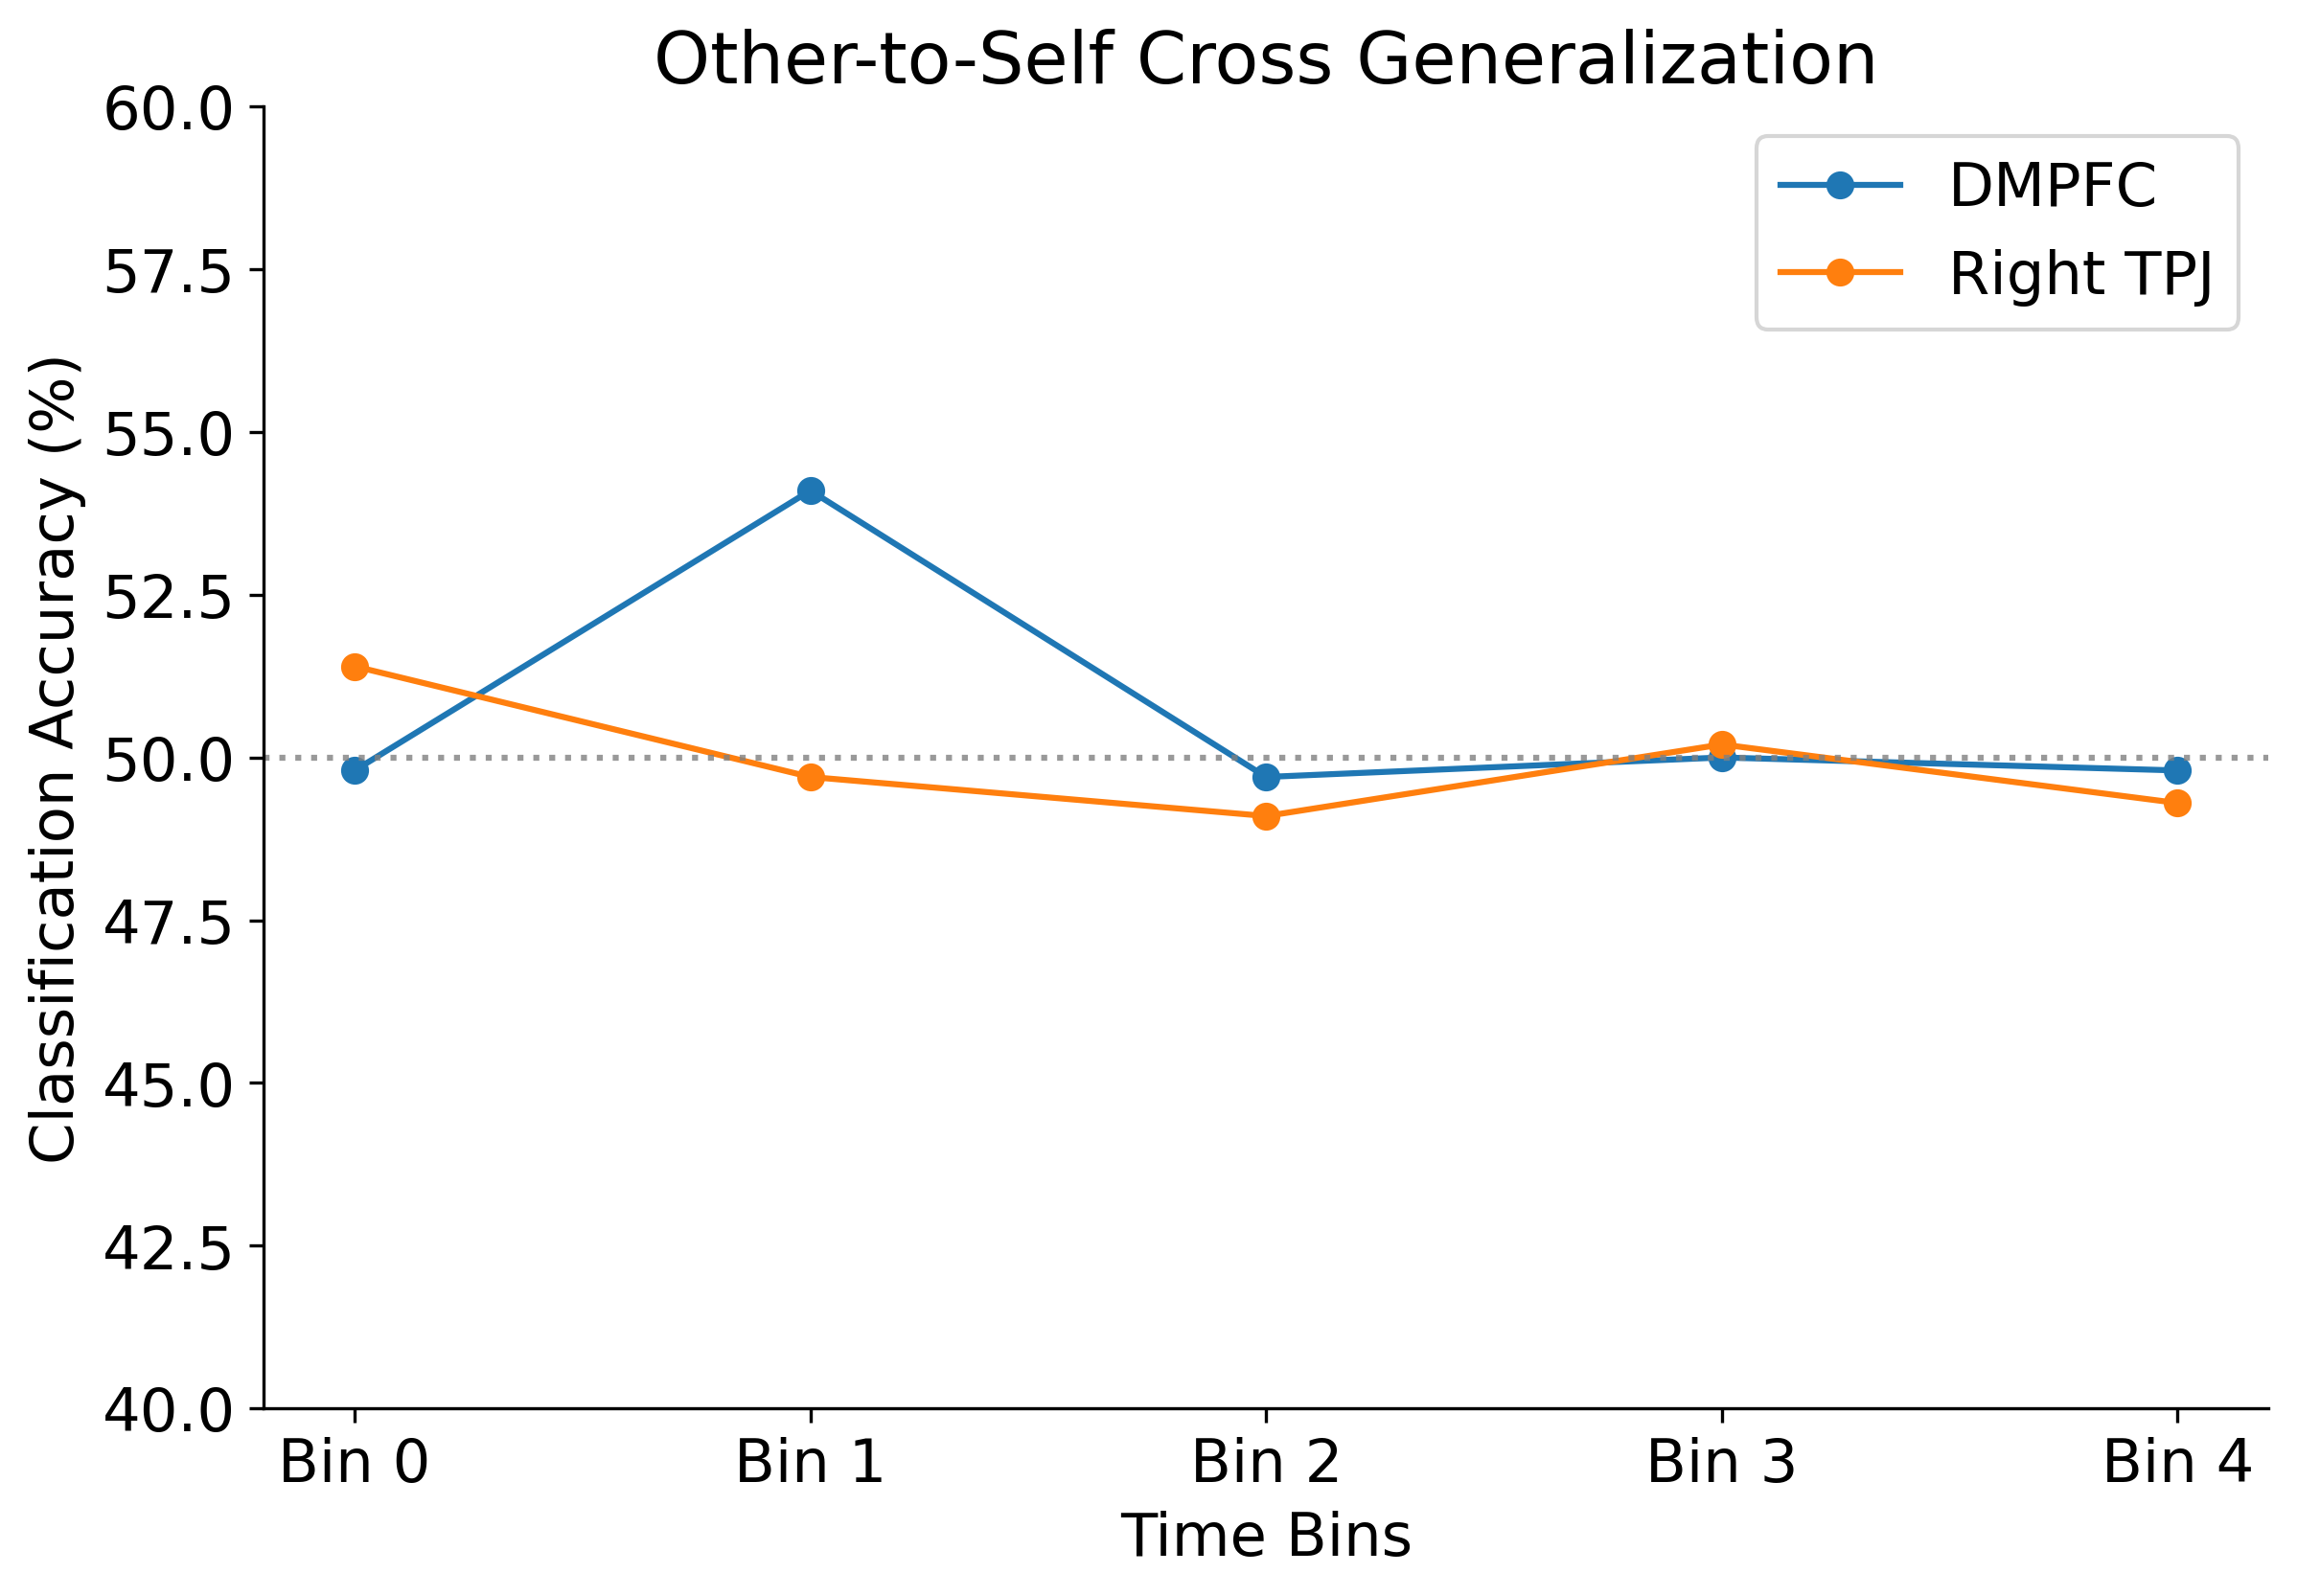

In [352]:
### MORE PLOTTING VARS 
roi_1 = 'LH_Default_PFC_11'
roi_2 = 'RH_Cont_Par_2'
roi_3 = 'rTPJ_SM-GLM'

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 300

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, np.round(np.array(roi_dic[roi_1])*100, 1), marker = 'o', label = 'DMPFC')
plt.plot(x_label, np.round(np.array(roi_dic[roi_2])*100, 1), marker = 'o', label = 'Right TPJ')
#plt.plot(x_label, roi_dic[roi_3], marker = 'o', label = 'rTPJ_L')

plt.axhline(y = 50, color = 'gray', linestyle = ':', alpha = 0.8) # , label = "chance" 

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(40, 60)

plt.title(f"Other-to-Self Cross Generalization")
plt.xlabel('Time Bins')
plt.ylabel('Classification Accuracy (%)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()


In [ ]:
## old

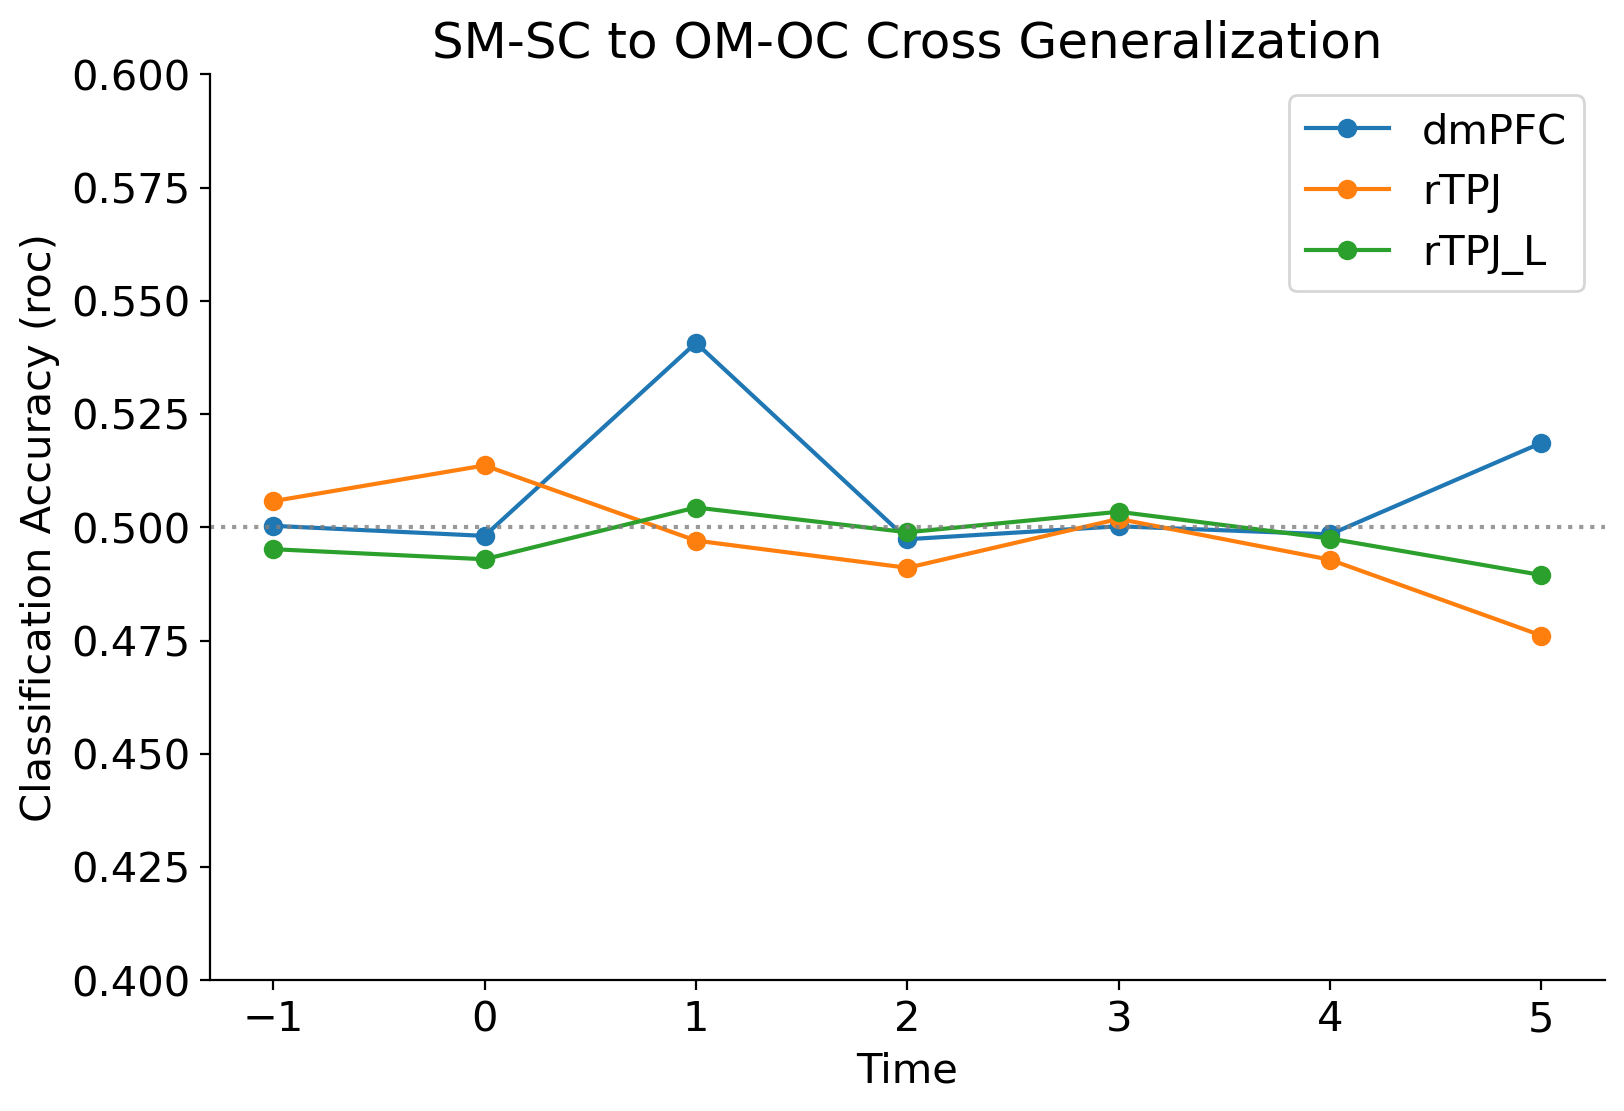

In [26]:
### MORE PLOTTING VARS 

## BEGIN ## 
plt.rcParams.update({'font.size': 15})

plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.dpi"] = 200

#x = np.arange(start_win, start_win+windows)
plt.plot(x_label, roi_dic[roi_1], marker = 'o', label = 'dmPFC')
plt.plot(x_label, roi_dic[roi_2], marker = 'o', label = 'rTPJ')
plt.plot(x_label, roi_dic[roi_3], marker = 'o', label = 'rTPJ_L')

plt.axhline(y = 0.5, color = 'gray', linestyle = ':', alpha = 0.8)

# plt.ylim([min(out_acc) - 0.05, max(out_acc) + 0.05])
plt.xticks(x_label)
plt.ylim(0.4, 0.6)

plt.title("SM-SC to OM-OC Cross Generalization")
plt.xlabel('Time')
plt.ylabel('Classification Accuracy (roc)')


plt.legend()
sns.despine()
#plt.savefig(f'{plot_dir}/{conds}_{analname}.png');
plt.show()
